In [1]:
from ebmdatalab import bq
from ebmdatalab import charts
from ebmdatalab import maps
import pandas as pd
import numpy as np

In [2]:
sql = '''
SELECT
month,
  extract(year from month) AS year,
  presc.bnf_code AS bnfcode,
  bnf_name AS bnfname,
  SUM(items) AS total_items,
  SUM(quantity) AS total_qty,
  SUM(quantity*adq.ADQ) AS adq,
  SUM(actual_cost) AS TotalCost
FROM
  ebmdatalab.hscic.normalised_prescribing_standard AS presc
LEFT JOIN 
ebmdatalab.hscic.compiled_ADQs_HC AS adq
ON
presc.bnf_code = adq.BNF_code
WHERE
  presc.bnf_code LIKE "0403010Y0AAAAAA"
  OR presc.bnf_code LIKE "0403010Y0AAABAB"
  OR presc.bnf_code LIKE "0403010Y0AAACAC"
GROUP BY
  month,
  year,
  presc.bnf_code,
  bnf_name
  '''

df_trimpramine = bq.cached_read(sql, csv_path='df_trimipramine.csv', use_cache=True)  # add `use_cache=False` to override
df_trimpramine.head(10)

C:\Users\bmackenna\Anaconda3\lib\site-packages\pandas_gbq\gbq.py:556: FutureWarning: verbose is deprecated and will be removed in a future version. Set logging level in order to vary verbosity
  "verbosity", FutureWarning, stacklevel=1)


,month,year,bnfcode,bnfname,total_items,total_qty,adq,TotalCost
0,2012-02-01,2012,0403010Y0AAABAB,Trimipramine Mal_Tab 10mg,1160,66063,8808.394561,7491.99000
1,2011-10-01,2011,0403010Y0AAABAB,Trimipramine Mal_Tab 10mg,1175,65227,8696.927963,7379.30000
2,2013-03-01,2013,0403010Y0AAAAAA,Trimipramine Mal_Cap 50mg,3955,232772,155181.322005,134705.50000
3,2018-02-01,2018,0403010Y0AAABAB,Trimipramine Mal_Tab 10mg,431,24155,3220.664678,143280.12264
4,2018-11-01,2018,0403010Y0AAACAC,Trimipramine Mal_Tab 25mg,849,41233,13744.329650,273907.05432
5,2015-02-01,2015,0403010Y0AAAAAA,Trimipramine Mal_Cap 50mg,3325,188504,125669.324159,242979.42000
6,2018-02-01,2018,0403010Y0AAAAAA,Trimipramine Mal_Cap 50mg,1993,114123,76081.994446,717785.42812
7,2017-11-01,2017,0403010Y0AAACAC,Trimipramine Mal_Tab 25mg,1084,53328,17775.995236,353142.79116
8,2017-12-01,2017,0403010Y0AAACAC,Trimipramine Mal_Tab 25mg,1108,53809,17936.328526,356992.27444
9,2012-07-01,2012,0403010Y0AAACAC,Trimipramine Mal_Tab 25mg,2994,178393,59464.317397,29401.85000


In [102]:
df_trimpramine.sort_values(by=['month','bnfcode']).head(10)


,month,year,bnfcode,bnfname,total_items,total_qty,adq,TotalCost
81,2010-08-01,2010,0403010Y0AAAAAA,Trimipramine Mal_Cap 50mg,4171,243277,162184.654827,68408.95
175,2010-08-01,2010,0403010Y0AAABAB,Trimipramine Mal_Tab 10mg,1265,69533,9271.060942,7861.38
225,2010-08-01,2010,0403010Y0AAACAC,Trimipramine Mal_Tab 25mg,3376,198731,66243.648913,32408.51
138,2010-09-01,2010,0403010Y0AAAAAA,Trimipramine Mal_Cap 50mg,4399,260315,173543.320665,85600.41
64,2010-09-01,2010,0403010Y0AAABAB,Trimipramine Mal_Tab 10mg,1327,71728,9563.727428,8110.18
159,2010-09-01,2010,0403010Y0AAACAC,Trimipramine Mal_Tab 25mg,3562,208291,69430.314726,33987.64
148,2010-10-01,2010,0403010Y0AAAAAA,Trimipramine Mal_Cap 50mg,4054,237316,158210.655117,69131.44
284,2010-10-01,2010,0403010Y0AAABAB,Trimipramine Mal_Tab 10mg,1310,71015,9468.660820,8027.37
41,2010-10-01,2010,0403010Y0AAACAC,Trimipramine Mal_Tab 25mg,3319,198189,66062.982295,32317.54
192,2010-11-01,2010,0403010Y0AAAAAA,Trimipramine Mal_Cap 50mg,4259,250250,166833.321154,62665.51


In [103]:
df = df_trimpramine.groupby(['year'])['adq'].sum()
df.round()



year
2010    1223092.0
2011    2793403.0
2012    2622639.0
2013    2410620.0
2014    2221613.0
2015    2029534.0
2016    1805858.0
2017    1433258.0
2018    1079606.0
2019      80757.0
Name: adq, dtype: float64

In [104]:
df2 = df.drop(df.index[[0,9]])
df2

,adq
year,
2011,2.793403e+06
2012,2.622639e+06
2013,2.410620e+06
2014,2.221613e+06
2015,2.029534e+06
2016,1.805858e+06
2017,1.433258e+06
2018,1.079606e+06


(0, 3000000)

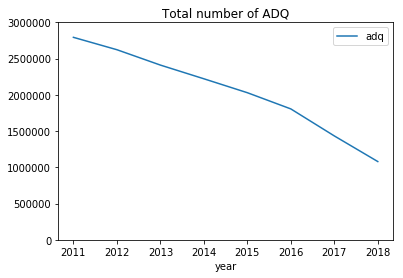

In [105]:
ax = df2.plot(kind='line', title = "Total number of ADQ")
ax.set_ylim(0, 3000000)